In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:\\Users\\lg\\Desktop\\하천_클러스터링.csv", encoding='cp949')

In [3]:
df.head()

,RIVERGAUGE_CODE,RIVERGAUGE_NAME,RIVER_NAME,GU_NAME,LEVEE_LEVEL,PLANFLOOD_LEVEL,ORDINARY_LEVEL,RIVERLEN
0,301,모래말옆,방학천,도봉구,24.63,23.89,20.95,20.7
1,302,노원교,중랑천,도봉구,30.92,28.43,21.44,96.4
2,303,계성교,우이천,도봉구,33.19,32.81,29.39,32.6
3,401,장월교,우이천,노원구,20.20,20.12,15.20,45.2
4,402,신의교,중랑천,노원구,40.02,39.32,32.87,134.5


In [4]:
features =df[['LEVEE_LEVEL','PLANFLOOD_LEVEL','ORDINARY_LEVEL','RIVERLEN']]

C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages

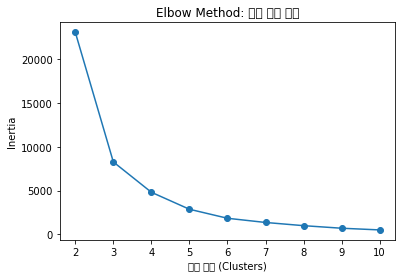

In [5]:
# 군집의 개수 범위를 지정합니다.
min_clusters = 2
max_clusters = 10

# 각 군집 개수에 따른 KMeans 모델을 만들고 inertia 값을 저장합니다.
inertia_values = []
for num_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Elbow Method를 시각화하여 군집의 최적 개수를 결정합니다.
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('군집 개수 (Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method: 군집 개수 결정')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.show()

C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


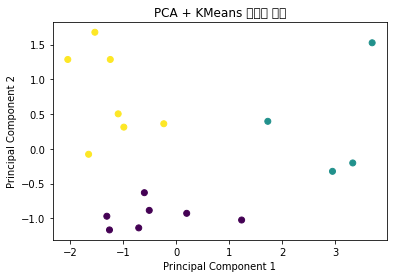

In [3]:
# 데이터 불러오기
df = pd.read_csv("C:\\Users\\lg\\Desktop\\하천_클_자료.csv", encoding='cp949')

# 필요한 열만 추출
features = df[['LEVEE_LEVEL', 'PLANFLOOD_LEVEL', 'ORDINARY_LEVEL','RIVERLEN']]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)  # 2개의 주성분을 사용
pca_features = pca.fit_transform(scaled_features)

# KMeans 모델 생성 및 군집 할당
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pca_features)
cluster_labels = kmeans.labels_

# 데이터프레임에 군집 결과 열 추가
df['Cluster'] = cluster_labels

# 각 군집별로 데이터프레임 생성
df1 = df[df['Cluster'] == 0].copy()
df2 = df[df['Cluster'] == 1].copy()
df3 = df[df['Cluster'] == 2].copy()

# 군집 결과 시각화
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + KMeans 군집화 결과')
plt.show()

In [28]:
df1 #노란색

,RIVERGAUGE_CODE,RIVERGAUGE_NAME,RIVER_NAME,GU_NAME,LEVEE_LEVEL,PLANFLOOD_LEVEL,ORDINARY_LEVEL,RIVERLEN,cluster_label,Cluster
0,301,모래말옆,방학천,도봉구,24.63,23.89,20.95,20.7,0,0
3,401,장월교,우이천,노원구,20.20,20.12,15.20,45.2,0,0
6,801,용두교,정릉천,동대문구,17.12,17.05,11.92,61.6,0,0
9,1401,증산교,불광천,서대문구,14.28,13.54,6.70,68.6,0,0
10,1501,성산2교,홍제천,마포구,16.32,15.30,10.80,48.9,0,0
13,2003,광화교,목감천,구로구,14.30,12.76,7.59,56.3,0,0
15,2301,신대방역,도림천,관악구,17.55,16.36,11.95,80.0,0,0


In [29]:
df2 #초록색

,RIVERGAUGE_CODE,RIVERGAUGE_NAME,RIVER_NAME,GU_NAME,LEVEE_LEVEL,PLANFLOOD_LEVEL,ORDINARY_LEVEL,RIVERLEN,cluster_label,Cluster
1,302,노원교,중랑천,도봉구,30.92,28.43,21.44,96.4,1,1
2,303,계성교,우이천,도봉구,33.19,32.81,29.39,32.6,0,1
4,402,신의교,중랑천,노원구,40.02,39.32,32.87,134.5,1,1
16,2303,양산교,도림천,관악구,35.40,34.52,31.05,32.4,0,1


In [30]:
df3 # 제방고, 계획홍수위, 하상고, 폭
# 남색

,RIVERGAUGE_CODE,RIVERGAUGE_NAME,RIVER_NAME,GU_NAME,LEVEE_LEVEL,PLANFLOOD_LEVEL,ORDINARY_LEVEL,RIVERLEN,cluster_label,Cluster
5,403,월계1교,중랑천,노원구,21.16,19.95,13.17,134.4,1,2
7,901,성동교,중랑천,성동구,19.49,17.05,4.00,235.9,2,2
8,902,마장2교,청계천,성동구,18.34,17.05,7.21,156.1,1,2
11,2001,고척교,안양천,구로구,15.44,14.07,3.09,224.4,2,2
12,2002,도림교,도림천,구로구,14.36,13.95,4.64,130.6,1,2
14,2201,기아대교,안양천,금천구,18.35,16.18,9.70,214.4,2,2
17,2502,봉은교,탄천,송파구,21.43,16.00,5.20,135.7,1,2


In [ ]:
# 제방고

In [37]:
df1['LEVEE_LEVEL'].mean()

17.771428571428572

In [38]:
df2['LEVEE_LEVEL'].mean()  # 특히 큼

34.8825

In [39]:
df3['LEVEE_LEVEL'].mean()

18.367142857142856

In [ ]:
# 계획홍수위

In [40]:
df1['PLANFLOOD_LEVEL'].mean()

17.002857142857142

In [41]:
df2['PLANFLOOD_LEVEL'].mean()  #특히 큼

33.77

In [42]:
df3['PLANFLOOD_LEVEL'].mean()

16.321428571428573

In [ ]:
# 하상고

In [43]:
df1['ORDINARY_LEVEL'].mean()

12.158571428571431

In [44]:
df2['ORDINARY_LEVEL'].mean() #특히 큼

28.687499999999996

In [45]:
df3['ORDINARY_LEVEL'].mean()

6.715714285714286

In [ ]:
# 폭

In [46]:
df1['RIVERLEN'].mean()

54.471428571428575

In [47]:
df2['RIVERLEN'].mean()

73.975

In [48]:
df3['RIVERLEN'].mean() # 특히 큼

175.92857142857142